In [256]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Грузим данные 

In [173]:
df_march = pd.read_csv('./data/2_march.csv', sep=';')
df_apr = pd.read_csv('./data/2_april.csv', sep=';')
df_may = pd.read_csv('./data/2_may.csv', sep=';')
df_checks  = pd.concat([df_march, df_apr, df_may], axis=0)

df_shops = pd.read_csv('./data/svao_info.csv', sep=';')
df_points = pd.read_csv('./data/projects for TT.csv', sep=';')
df_left = pd.read_csv('./data/2_ost.csv', sep=';')

Выделяем признаки 

In [174]:
date = pd.to_datetime(df_checks['date_ch'])
df_checks['day'] = date.dt.day
df_checks['year'] = date.dt.year
df_checks['month'] = date.dt.month
df_checks['week'] = date.dt.week
df_checks['day_of_week'] = date.dt.day_name()

df_checks['hour'] = df_checks['time_ch'].apply(lambda x: x.split(':')[0]).astype(int)
df_checks['time'] = df_checks['time_ch'].apply(lambda x: x.split(':')[1]).astype(int)

D:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Выделяем плохие и хорошие магазины на основе изменения продаж за 3 месяца 

In [188]:
df_pivot_table = df_checks.pivot_table(columns=['week'], index=['id_tt_cl'], values = ['BaseSum']).pct_change(axis=1)

In [326]:
df_target = (df_pivot_table - df_pivot_table.median()).sum(axis=1)

D:\programs\anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning:

All-NaN slice encountered



In [327]:
df_target[df_target<0] = -1
df_target[(df_target<0.025103) & (df_target>0)] = 0
df_target[df_target>=0.025103] = 1

In [337]:
df_target = df_target.reset_index()
df_target.columns = ['id_tt', 'good_or_bad']

In [339]:
df_shops.merge(df_target, how='left', on='id_tt').to_csv('target_shops.csv')

Новый расчёт 

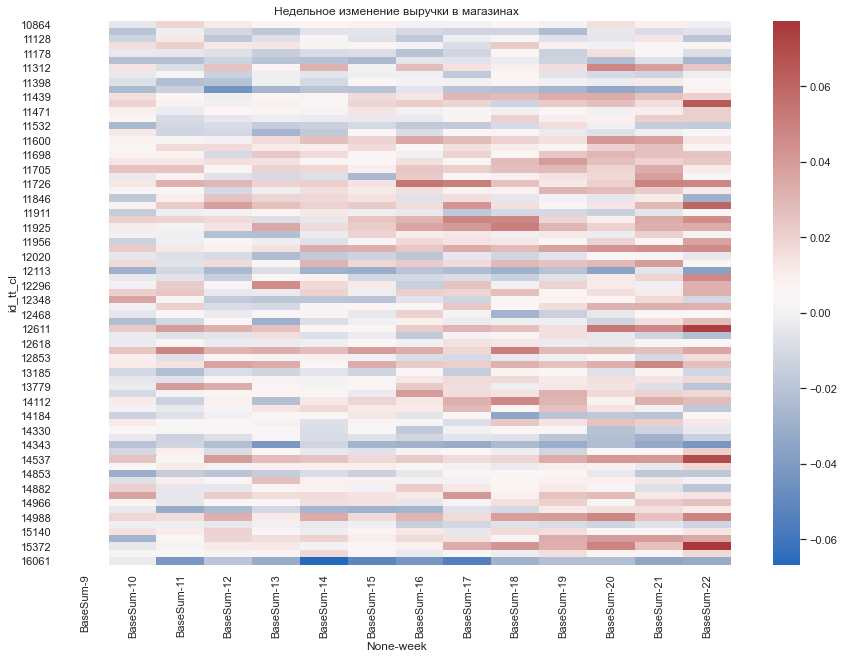

In [306]:
plt.figure(figsize=(15, 10))
sns.heatmap((df_pivot_table - df_pivot_table.median()).cumsum(axis=1), cmap='vlag')
plt.title('Недельное изменение выручки в магазинах');

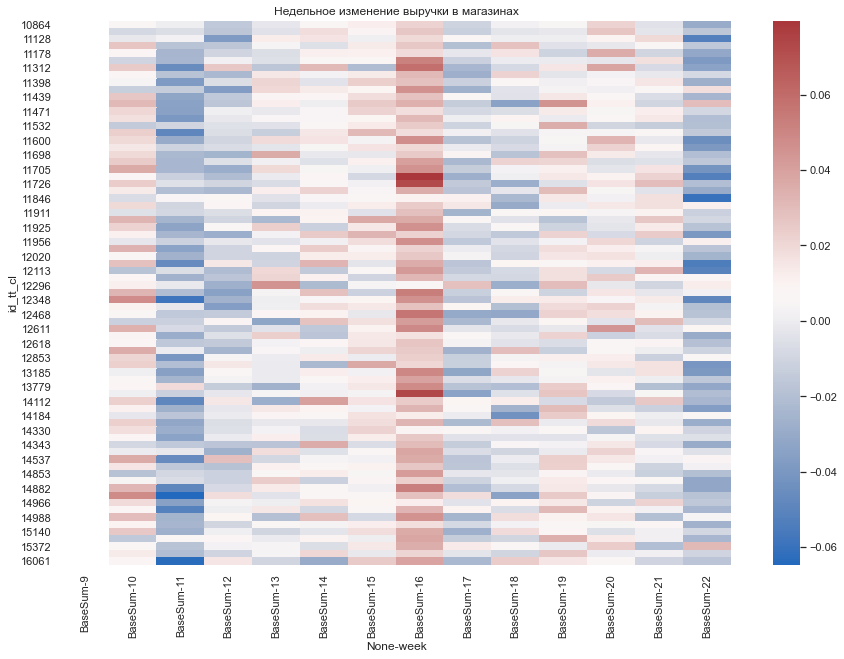

In [221]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot_table, cmap='vlag')
plt.title('Недельное изменение выручки в магазинах');

In [210]:
(df_pivot_table>0).astype(int).sum(axis=1).sort_values()

id_tt_cl
11127     4
11532     5
12113     5
12611     5
14853     5
         ..
11512     9
15123     9
12015     9
15372     9
11128    10
Length: 75, dtype: int64

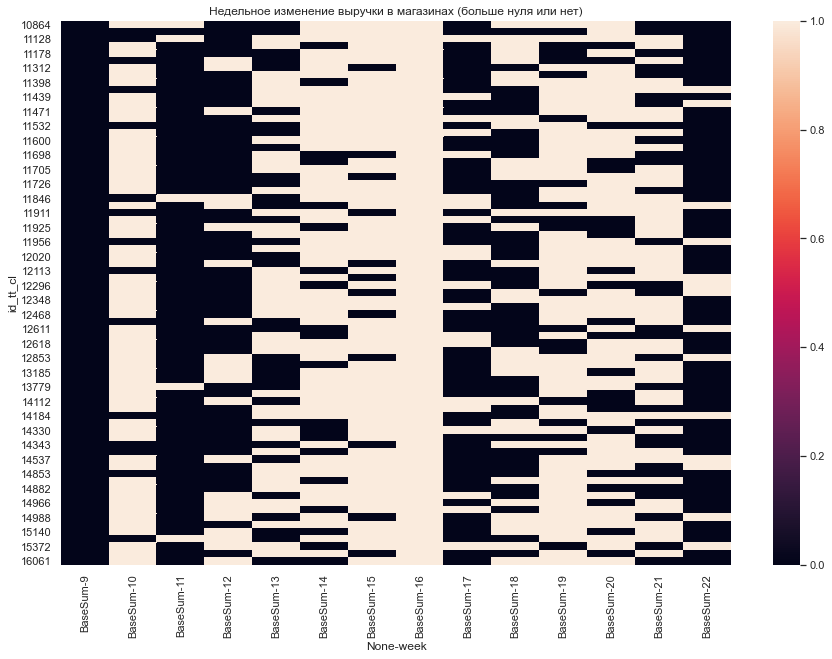

In [199]:
plt.figure(figsize=(15, 10))
sns.heatmap((df_pivot_table>0).astype(int))
plt.title('Недельное изменение выручки в магазинах (больше нуля или нет)');

In [212]:
(df_pivot_table<df_pivot_table.quantile(0.2)).astype(int).sum(axis=1).sort_values()

id_tt_cl
10864    0
13552    0
12015    0
11439    0
12181    1
        ..
12113    5
12296    5
11312    5
11128    5
16061    5
Length: 75, dtype: int64

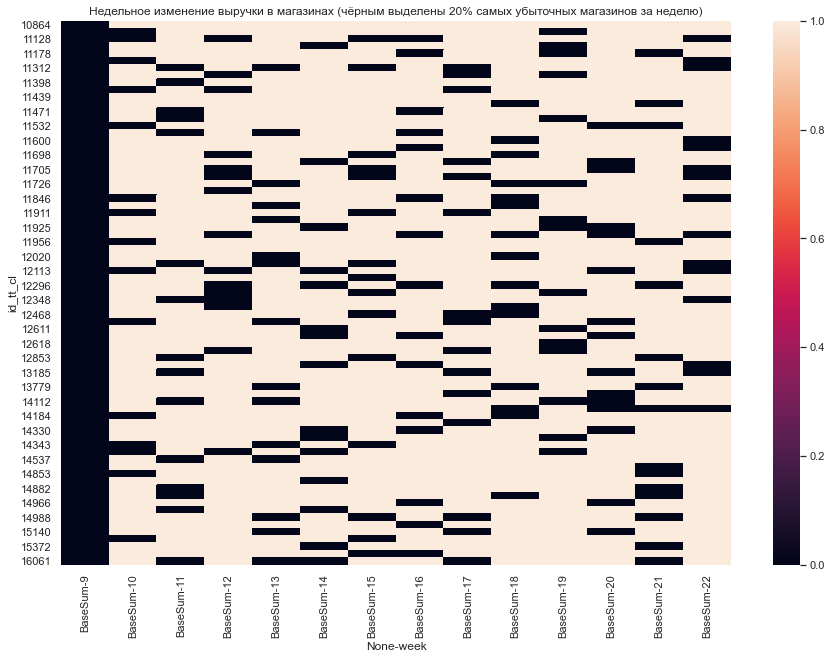

In [202]:
plt.figure(figsize=(15, 10))
sns.heatmap((df_pivot_table>df_pivot_table.quantile(0.2)).astype(int))
plt.title('Недельное изменение выручки в магазинах (чёрным выделены 20% самых убыточных магазинов за неделю)');

In [207]:
(df_pivot_table>df_pivot_table.quantile(0.8)).astype(int).sum(axis=1).sort_values()

id_tt_cl
14853    0
14332    0
13552    0
15123    0
12618    0
        ..
12337    4
12611    5
14112    5
14988    5
12296    5
Length: 75, dtype: int64

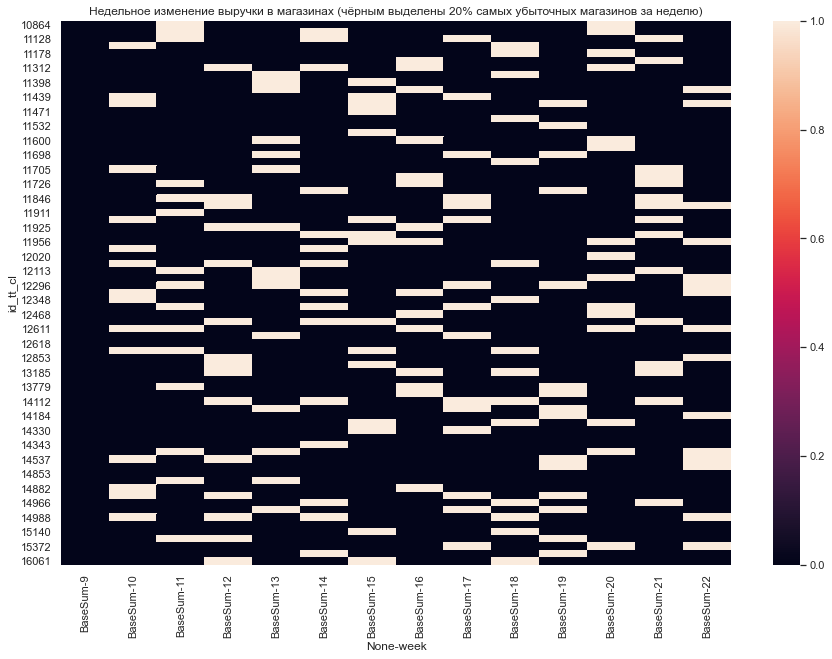

In [203]:
plt.figure(figsize=(15, 10))
sns.heatmap((df_pivot_table>df_pivot_table.quantile(0.8)).astype(int))
plt.title('Недельное изменение выручки в магазинах (белым выделены 20% самых прибыльных магазинов за неделю)');

In [ ]:
plt.figure(figsize=(15, 10))    








sns.heatmap((df_pivot_table>df_pivot_table.quantile(0.8)).astype(int))
plt.title('Недельное изменение выручки в магазинах (белым выделены 20% самых прибыльных магазинов за неделю)');

In [246]:
df_mean_revenue_diff = df_checks[df_checks['day']<=7].pivot_table(columns=['month'], index=['id_tt_cl'], values = ['BaseSum']).pct_change(axis=1).mean(axis=1).reset_index()

In [ ]:
df_mean_revenue_diff

In [250]:
df_mean_revenue_diff = df_checks[df_checks['day']<=7].pivot_table(columns=['month'], index=['id_tt_cl'], values = ['BaseSum']).pct_change(axis=1).mean(axis=1)reset_index()
df_mean_revenue_diff.columns = ['id_tt', 'mean_pct_change_revenue']
df_mean_revenue_diff['mean_pct_change_revenue'] = df_mean_revenue_diff['mean_pct_change_revenue'].round(3)

<AxesSubplot:>

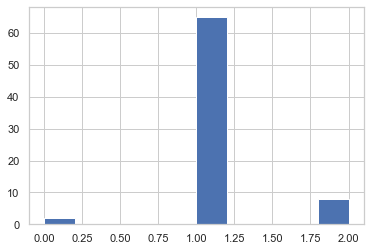

In [159]:
(df_mean_revenue_diff['BaseSum'][[4, 5]]>0).astype(int).sum(axis=1).hist()

In [170]:
# plt.figure(figsize=(5, 15))
# sns.heatmap(df_mean_revenue_diff['BaseSum'])

In [150]:
#plt.plot(df_mean_revenue_diff['id_tt'],df_mean_revenue_diff['mean_pct_change_revenue'], color='green')

(0.0, 1000.0)

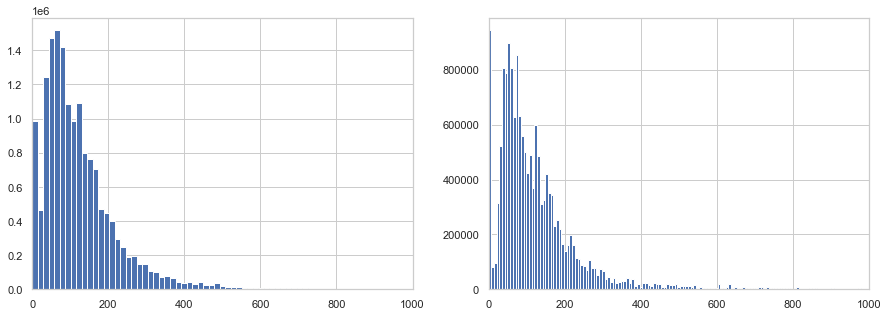

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df_checks.BaseSum.hist(bins= 1000);
plt.xlim(0, 1000)

plt.subplot(1, 2, 2)
df_checks.BasePrice.hist(bins=1000);
plt.xlim(0, 1000)

In [49]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

In [68]:
df_heatmap = df_checks[(df_checks.hour>6) & (df_checks.hour<= 24)].pivot_table(index='day_of_week', columns='hour', values='BaseSum', aggfunc='sum')
df_heatmap = df_heatmap.reindex(cats) 

Text(0.5, 1.0, 'График ')

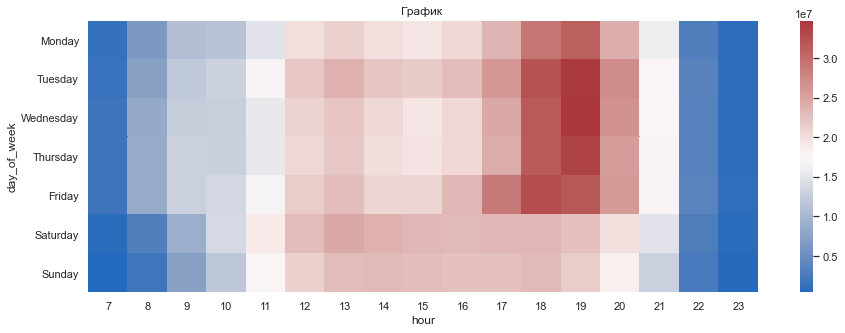

In [69]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_heatmap, cmap='vlag')
plt.title('График')

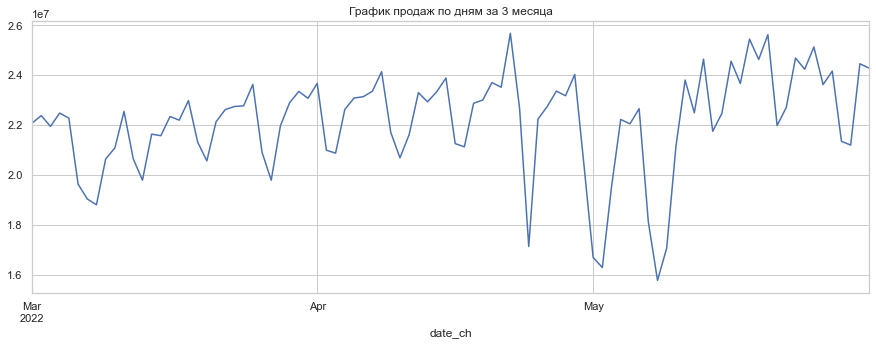

In [34]:
df_checks.resample('1D')['BasePrice'].sum().plot(figsize=(15,5), title='График продаж по дням за 3 месяца');

<AxesSubplot:title={'center':'Распределение плохих магазинов по кол-ву недель'}>

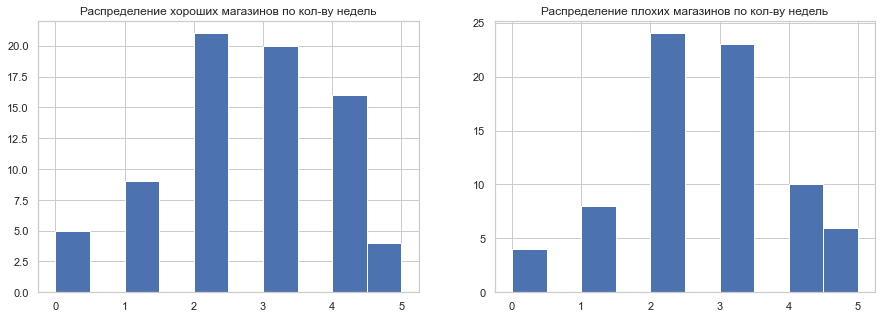

In [222]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Распределение хороших магазинов по кол-ву недель')
df_head = (df_pivot_table>df_pivot_table.quantile(0.8)).astype(int).sum(axis=1)
df_head.hist()

plt.subplot(1, 2, 2)
plt.title('Распределение плохих магазинов по кол-ву недель')
df_tail = (df_pivot_table<df_pivot_table.quantile(0.2)).astype(int).sum(axis=1)
df_tail.hist()

In [233]:
top_diff = (df_head - df_tail).sort_values().reset_index()
top_diff.columns = ['id_tt', 'top_index']

In [242]:
df_merge.to_csv('./data/df_merge.csv')

In [260]:
#df_pivot_table

In [251]:
df_merge = df_shops.merge(df_mean_revenue_diff)

In [261]:
# fig = px.scatter_mapbox(df_merge, lat="Shirota", lon="Dolgota", hover_name="format", hover_data=["Район", "ploshad", "shtat", 'qty_kassa', 'qty_kassa_so'],
#                         color_discrete_sequence=["green"], color="top_index", size = 'ploshad', zoom=10)
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
#fig.write_html('map_vkusvill_top_index.html')

In [267]:
df_left.dtypes

id_tt          int64
id_tov         int64
name_tov      object
id_group       int64
name_gr       object
id_group2      int64
name_gr2      object
date_tt       object
morning      float64
evening      float64
post          object
dtype: object

In [277]:
df_left['post'] = [int(i) if type(i)==int else float(i.replace(',', '.')) for i in df_left['post']]

In [278]:
df_left['diff'] = df_left['morning'] - df_left['evening'] + df_left['post']

In [286]:
df_left['morning'] - df_left['evening'] 

0          1.0
1          NaN
2          2.0
3          1.0
4         -1.0
          ... 
6697199    NaN
6697200    NaN
6697201    NaN
6697202    NaN
6697203    NaN
Length: 6697204, dtype: float64

In [287]:
df_left['diff'].hist

0          1.0
1          NaN
2          2.0
3          1.0
4          5.0
          ... 
6697199    NaN
6697200    NaN
6697201    NaN
6697202    NaN
6697203    NaN
Name: diff, Length: 6697204, dtype: float64

In [292]:
df_ost = df_left.groupby(['name_gr'])['diff'].sum()

<BarContainer object of 59 artists>

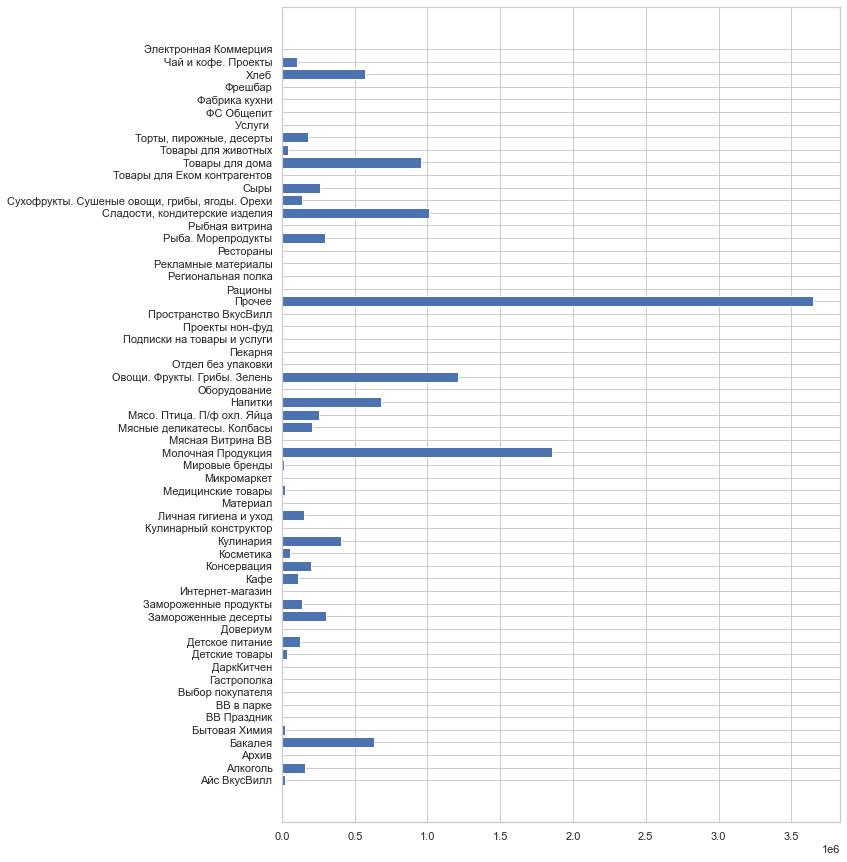

In [295]:
plt.figure(figsize=(10, 15))
plt.barh(df_ost.index, df_ost.values)